In [10]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
df=pd.read_csv("Churn_Modelling.csv")

In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.shape

(10000, 14)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: >

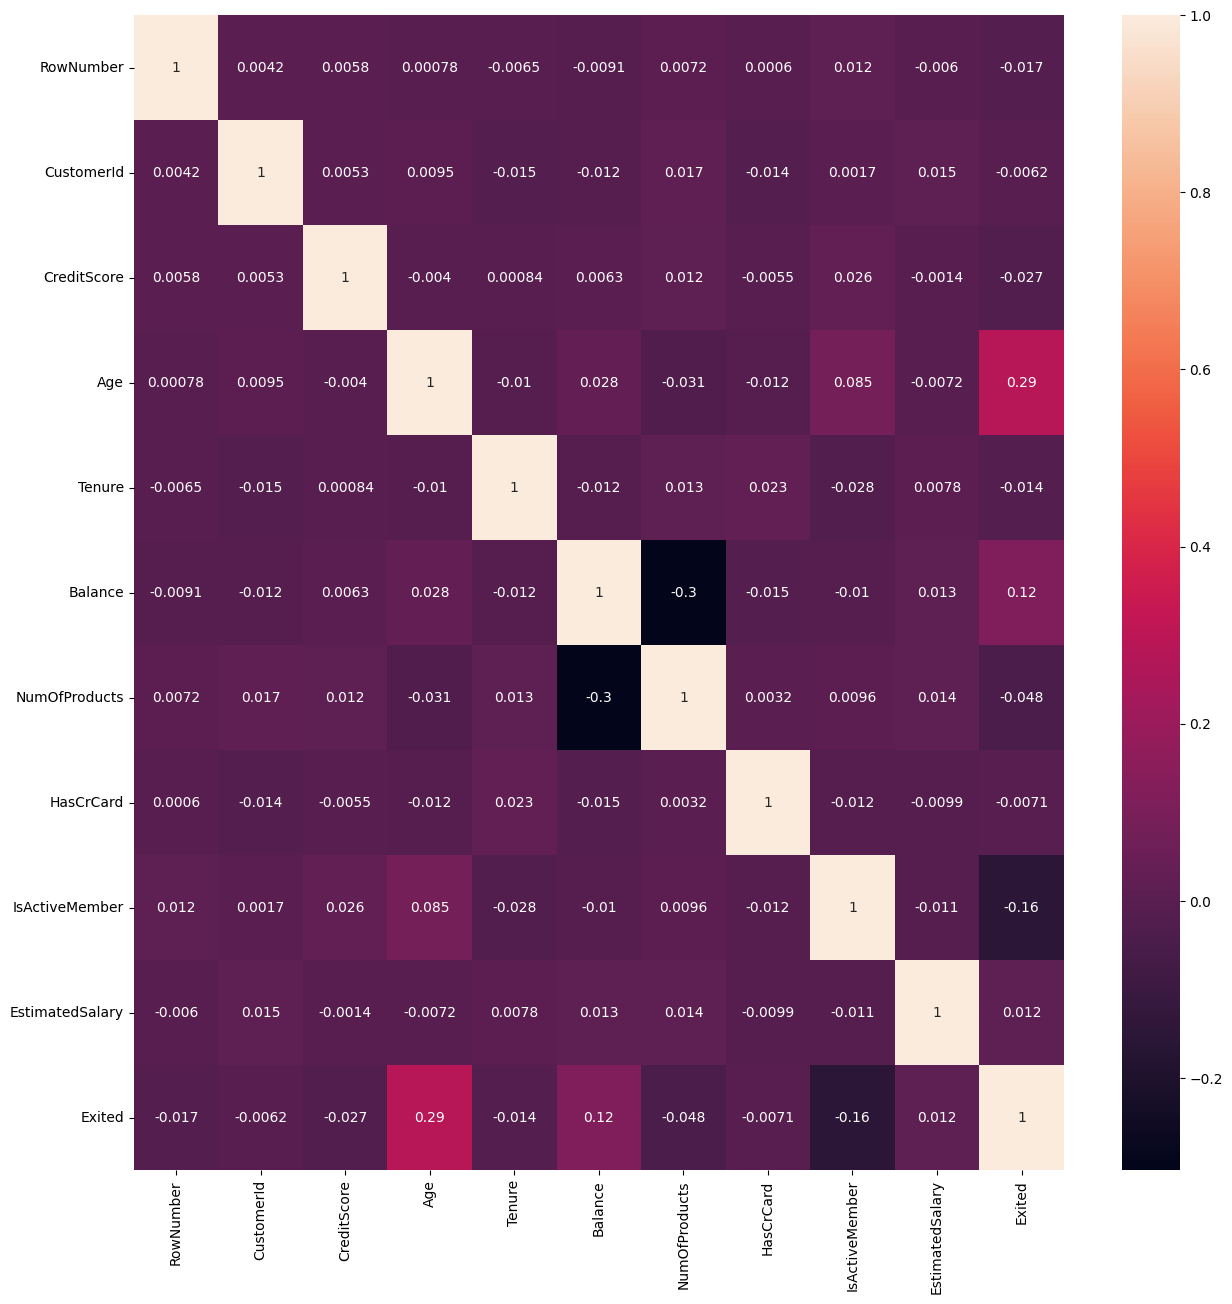

In [16]:
# Select only the numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Create a correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True)


In [17]:
#sns.pairplot(data=df)

In [18]:
### converting the data categorical to numerical
print(df["Geography"].value_counts())
print(df["Gender"].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64


In [19]:
labelencoder=LabelEncoder()
df["Geography"]=labelencoder.fit_transform(df["Geography"])
df["Gender"]=labelencoder.fit_transform(df["Gender"])
print(df["Geography"].value_counts())
print(df["Gender"].value_counts())

Geography
0    5014
1    2509
2    2477
Name: count, dtype: int64
Gender
1    5457
0    4543
Name: count, dtype: int64


In [20]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [21]:
## Spliting the data into X and y
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [22]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [23]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [24]:
## Splitting the data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X train Shape: {X_train.shape}, and size is: {X_train.size}")
print(f"y train Shape: {y_train.shape}, and size is: {y_train.size}")
print(f"X test Shape: {X_test.shape}, and size is: {X_test.size}")
print(f"y test Shape: {y_test.shape}, and size is: {y_test.size}")

X train Shape: (8000, 10), and size is: 80000
y train Shape: (8000,), and size is: 8000
X test Shape: (2000, 10), and size is: 20000
y test Shape: (2000,), and size is: 2000


In [25]:
# Scallig the data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Let's Make ANN

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout


In [28]:
# Initializing the ANN
classifier=Sequential()

In [29]:
# Adding the input layer and first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=10))
#classifier.add(Dropout(0.3))


In [30]:
# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))
#classifier.add(Dropout(0.4))

In [31]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))


In [32]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier

In [33]:
# Training the ANN on the Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)


Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 0.5929 - accuracy: 0.7947 - val_loss: 0.5236 - val_accuracy: 0.7914
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4891 - accuracy: 0.7955 - val_loss: 0.4785 - val_accuracy: 0.7921
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4589 - accuracy: 0.7962 - val_loss: 0.4565 - val_accuracy: 0.7967
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4404 - accuracy: 0.8048 - val_loss: 0.4445 - val_accuracy: 0.8031
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4291 - accuracy: 0.8085 - val_loss: 0.4378 - val_accuracy: 0.8179
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4221 - accuracy: 0.8186 - val_loss: 0.4338 - val_accuracy: 0.8247
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4160 - accuracy: 0.8248 - val_loss: 0.4297 - val_accuracy: 0.8319

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


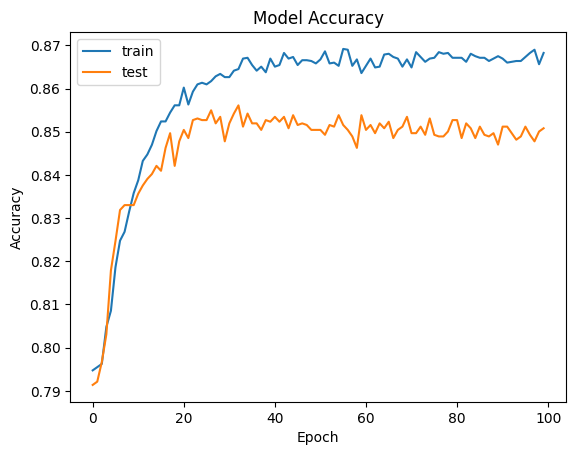

In [34]:
print(model_history.history.keys())

# Plot training and validation accuracy
plt.plot(model_history.history["accuracy"])  # Use "accuracy" for training accuracy
plt.plot(model_history.history["val_accuracy"])  # Use "val_accuracy" for validation accuracy

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [35]:
### part 3- making the prediction and evaluation and the model
# prediction the test set result
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

In [36]:
## making the confusion the confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("Confusion Matrics:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))

Confusion Matrics:
 [[1544   63]
 [ 208  185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Accuracy: 0.8645


### Hyperparameter Tuning To decide Number of Hidden Layers

In [37]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Activation, Embedding, Flatten, BatchNormalization
from keras.layers import Activation  # To access activation functions like relu, sigmoid, etc.


In [39]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define a function to create the Keras model
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
    model.add(Dense(units=1, kernel_initializer="glorot_uniform", activation="sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

layers = [[20], [40, 20], [45, 30, 15]]
activation = ["sigmoid", "relu"]
param_grid = dict(layers=layers, activation=activation, batch_size=[128, 256], epochs=[30])

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)


C:\Users\raman\AppData\Local\Temp\ipykernel_8136\3266606689.py:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [40]:
# Print the best result and parameters
print(grid_result.best_score_, grid_result.best_params_)


0.8561249852180481 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': [45, 30, 15]}


In [41]:
# Make predictions on the test set
pred_y = grid.predict(X_test)
y_pred = (pred_y > 0.5)

In [42]:
## making the confusion the confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("Confusion Matrics:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))

Confusion Matrics:
 [[1560   47]
 [ 236  157]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.40      0.53       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000

Accuracy: 0.8585
